<a href="https://colab.research.google.com/github/palberth/Mineria-de-Datos-MASDI/blob/main/BurnDownChart_Proyecto_Alcanalitycs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

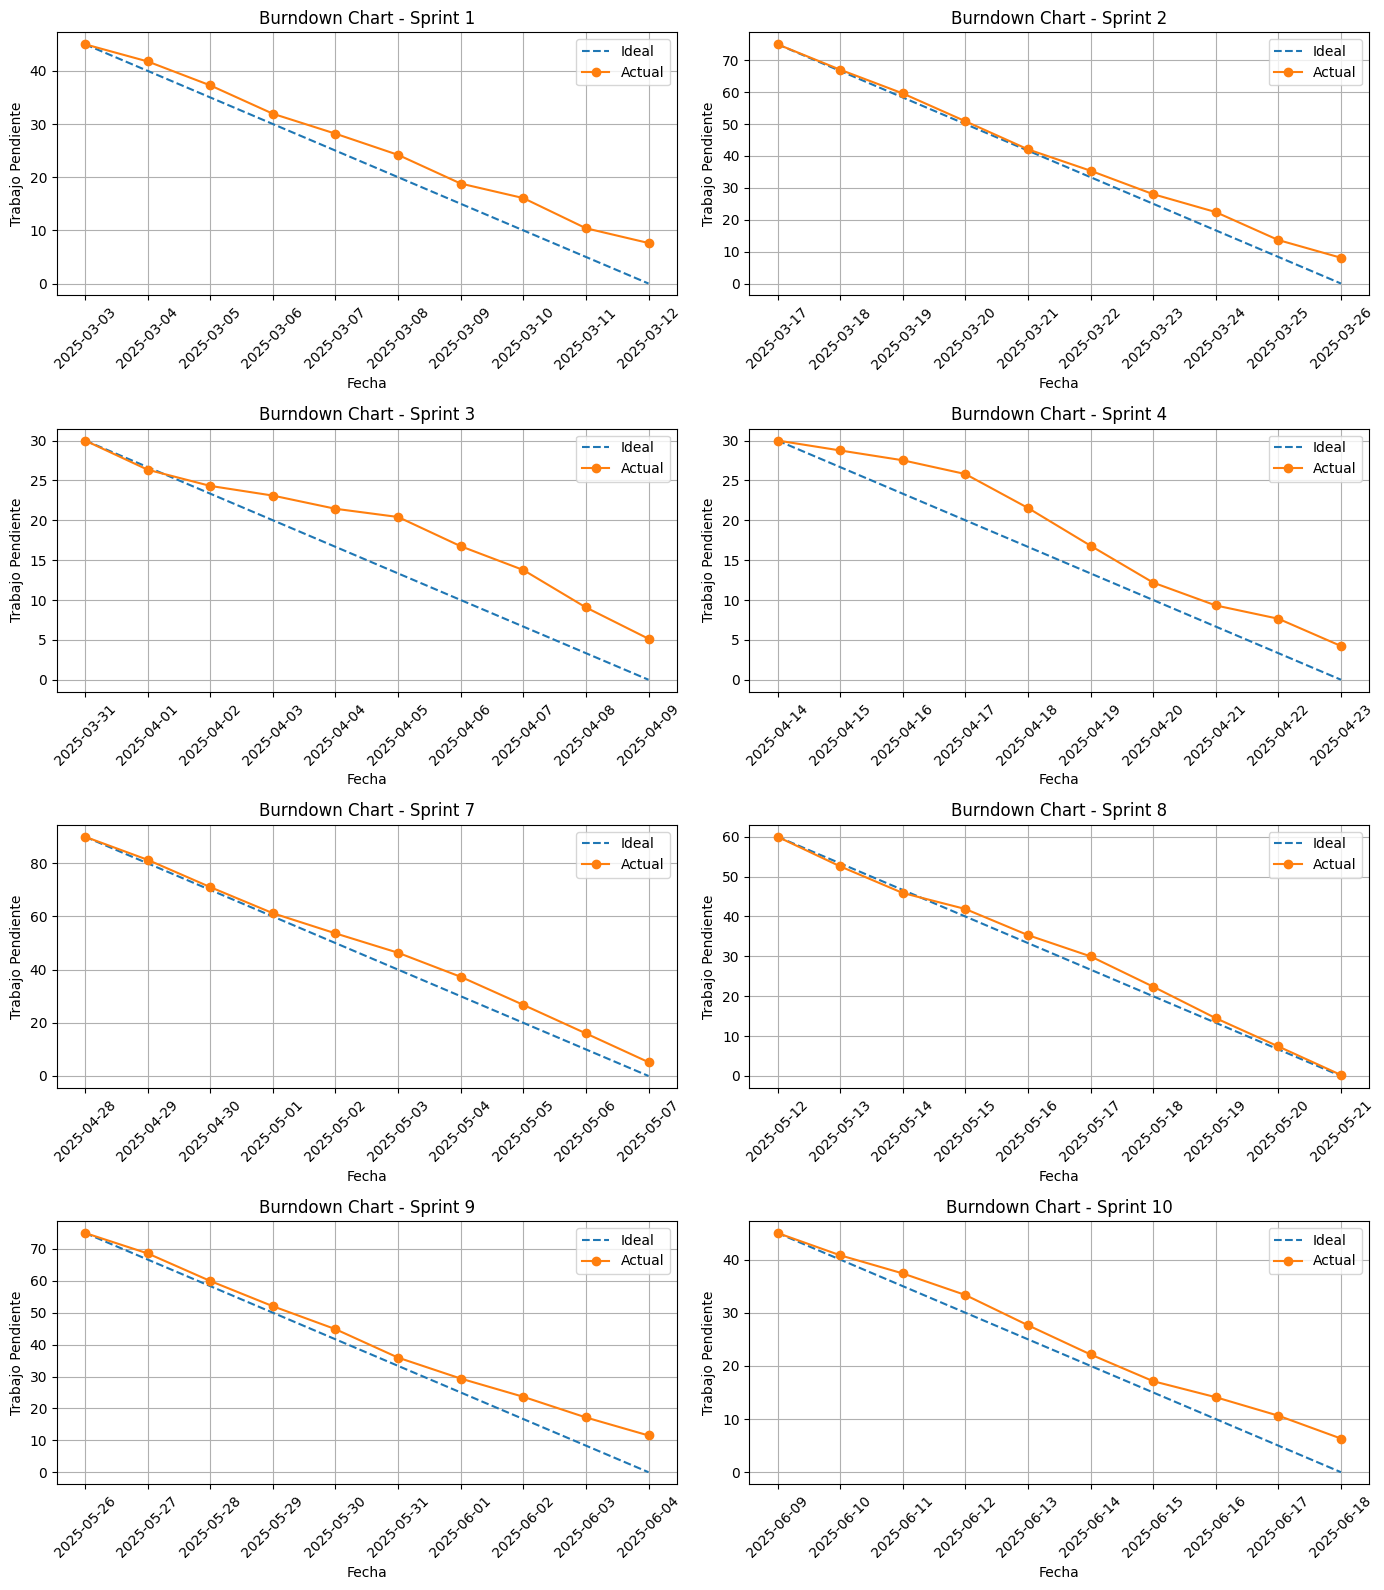

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Cargar archivo Excel exportado desde Jira
file_path = 'Jira proyecto Alkanalitycs.xlsx'  # Asegúrate de subir el archivo a Colab o tenerlo en la misma carpeta en Jupyter
xls = pd.ExcelFile(file_path)
df = xls.parse(xls.sheet_names[0])

# Preprocesamiento
df["Sprint"] = df["Sprint"].str.strip()
df["Estimación"] = pd.to_numeric(df["Estimación"], errors="coerce")
df = df.dropna(subset=["Sprint", "Estimación"])

# Configuración de sprints simulados
sprint_duration = 10  # duración en días
base_start_date = datetime(2025, 3, 3)  # fecha de inicio del Sprint 1

# Ordenar los sprints numéricamente
all_sprints = sorted(df["Sprint"].dropna().unique(), key=lambda x: int(x.split()[-1]))

# Asignar fechas a cada sprint
sprint_dates = {
    sprint: base_start_date + timedelta(weeks=2 * i)
    for i, sprint in enumerate(all_sprints)
}

# Generar datos para los burndown charts
burndown_data = {}

for sprint, start_date in sprint_dates.items():
    sprint_df = df[df["Sprint"] == sprint]
    total_estimation = sprint_df["Estimación"].sum()
    if total_estimation == 0:
        continue

    days = [start_date + timedelta(days=i) for i in range(sprint_duration)]
    ideal_burn = np.linspace(total_estimation, 0, sprint_duration)

    actual_burn = [total_estimation]
    for i in range(1, sprint_duration):
        decrement = total_estimation / sprint_duration + np.random.uniform(-2, 2)
        next_value = max(actual_burn[-1] - decrement, 0)
        actual_burn.append(next_value)

    burndown_data[sprint] = {
        "dates": days,
        "ideal": ideal_burn,
        "actual": actual_burn
    }

# Graficar los burndown charts
cols = 2
rows = (len(burndown_data) + 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(14, rows * 4))
axs = axs.flatten()

for idx, (sprint, data) in enumerate(burndown_data.items()):
    axs[idx].plot(data["dates"], data["ideal"], label="Ideal", linestyle="--")
    axs[idx].plot(data["dates"], data["actual"], label="Actual", marker="o")
    axs[idx].set_title(f"Burndown Chart - {sprint}")
    axs[idx].set_xlabel("Fecha")
    axs[idx].set_ylabel("Trabajo Pendiente")
    axs[idx].legend()
    axs[idx].grid(True)
    axs[idx].tick_params(axis='x', rotation=45)

for ax in axs[len(burndown_data):]:
    ax.axis('off')

plt.tight_layout()
plt.show()